In [2]:
import numpy as num
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
wine = pd.read_csv(r"D:/personal projects/wine quality prediction/WineQT.csv")

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
wine.shape

(1143, 13)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

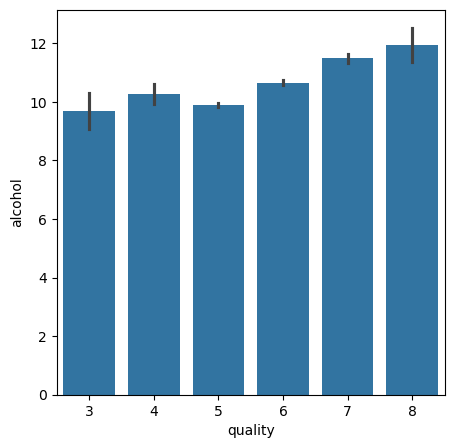

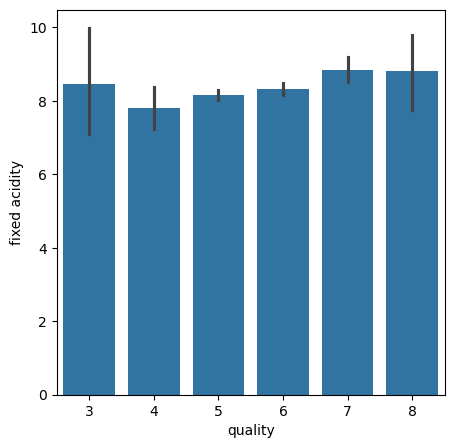

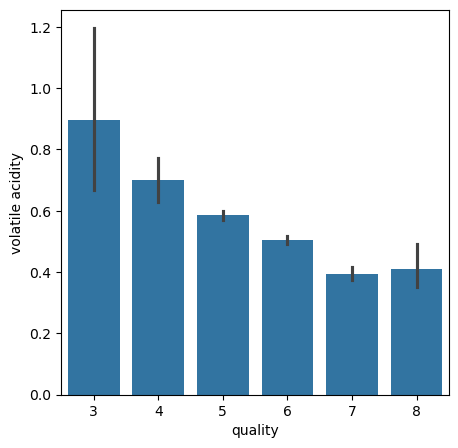

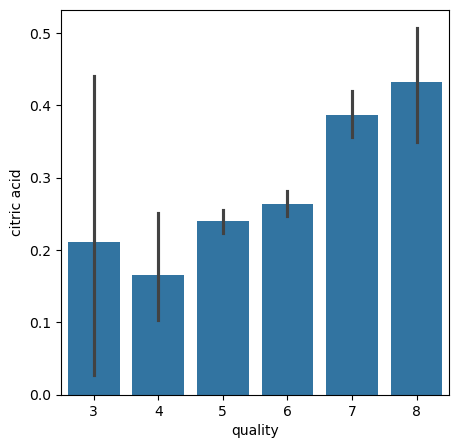

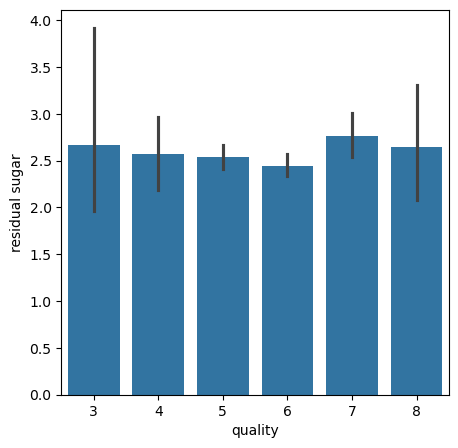

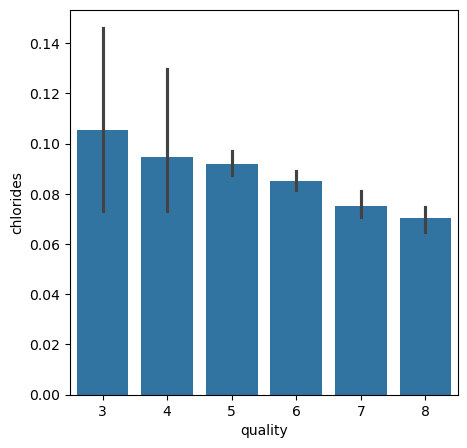

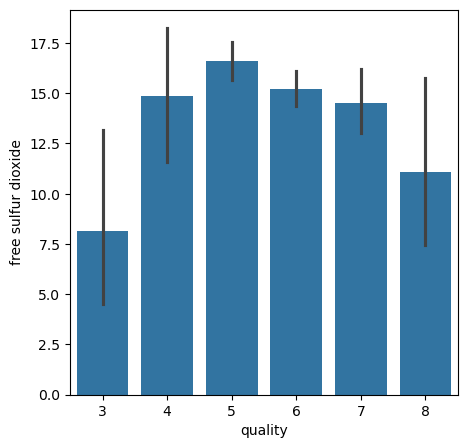

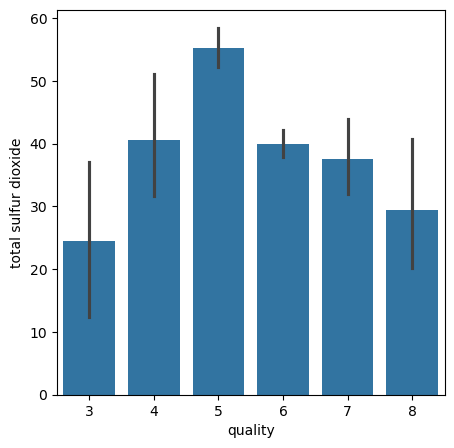

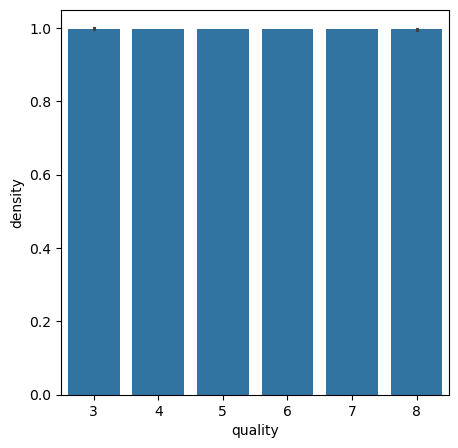

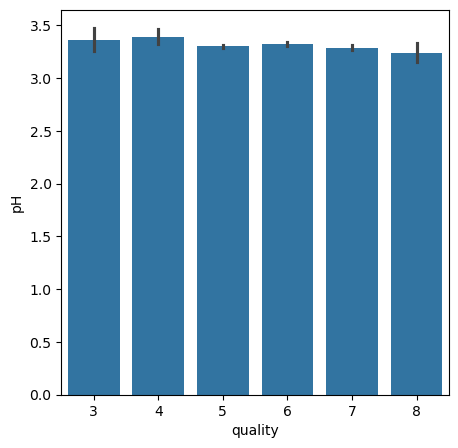

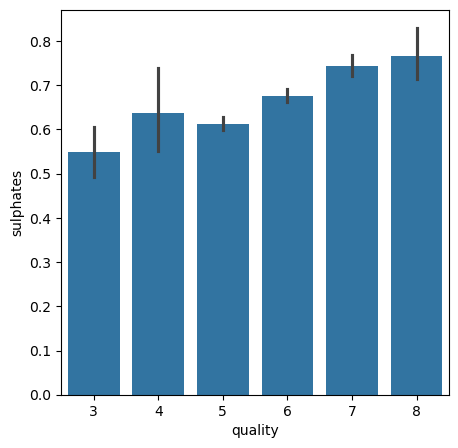

In [7]:
plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='alcohol', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='fixed acidity', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='citric acid', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='residual sugar', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='chlorides', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='density', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='pH', data=wine)
plt.show()

plt.figure(figsize = (5,5))
sns.barplot(x='quality', y='sulphates', data=wine)
plt.show()


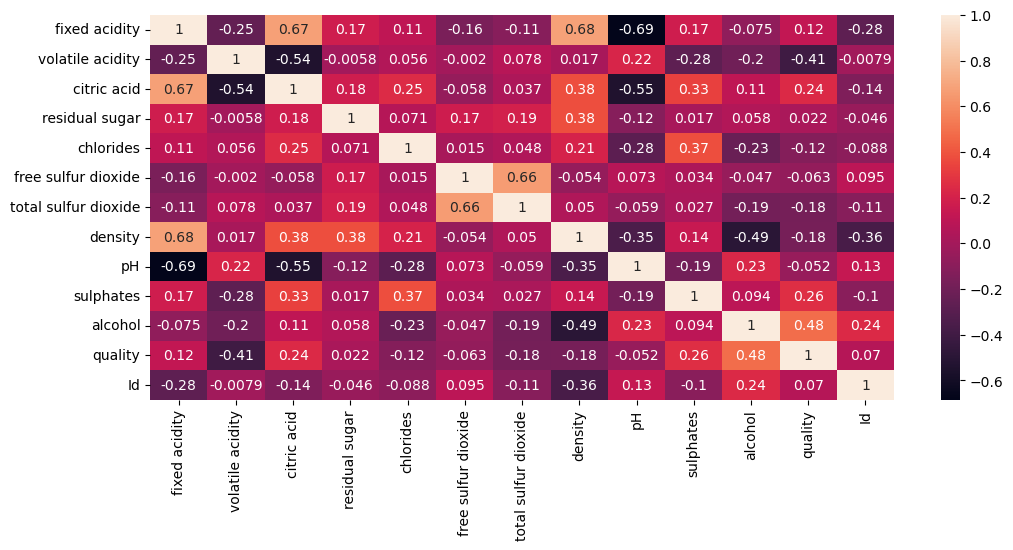

In [8]:
plt.figure(figsize = (12,5))
sns.heatmap(wine.corr(), annot=True)
plt.show()

In [9]:
#model training
feature_columns = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
]

X = wine[feature_columns]
Y = wine['quality'].apply(lambda y: 1 if y >= 7 else 0)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
#logisticregression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, Y_train)
X_test_predict1 = log.predict(X_test)
accuracy_score(Y_test, X_test_predict1)

c:\Users\amuly\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8820960698689956

In [13]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
X_test_predict2 = knn.predict(X_test)
accuracy_score(Y_test, X_test_predict2)

0.8602620087336245

In [14]:
#svm
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, Y_train)
X_test_predict3 = svm.predict(X_test)
accuracy_score(Y_test, X_test_predict3)

0.868995633187773

In [15]:
#RandomForest (evaluation)
from sklearn.ensemble import RandomForestClassifier
rando = RandomForestClassifier()
rando.fit(X_train, Y_train)
X_test_predict4 = rando.predict(X_test)
accuracy_score(Y_test, X_test_predict4)

0.9082969432314411

In [16]:
input_data = (10.5,0.51,0.64,2.4,0.107,6,15,0.9973,3.09,0.66,11.8)

input_data_as_numpy_array = num.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rando.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good quality')
else:
    print('Bad quality')

[1]
Good quality


c:\Users\amuly\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [18]:
import pickle

pickle.dump(rando, open('model.pkl', 'wb'))
pickle.dump(feature_columns, open('features.pkl', 'wb'))

In [19]:
import os
print(os.getcwd())

d:\personal projects\wine quality prediction
